In [1]:
import os
os.chdir("../../..")
import jax
jax.devices()

[CpuDevice(id=0)]

In [2]:
from scripts.nj.neurosci import *
import scripts.nj.graph_to_arrays as ga
import scripts.data_preparation as dp
import networkx as nx

d:\Iliuha_projects\neurosci\bbab\Drosophila-Larvae-Simulation\.venv_jax\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Получаем данные

In [3]:
neurons_ids = [
    "7055857",
]

DIR = "Ilya/trash/del_this"
neurons_ids = [int(i) for i in neurons_ids]
sc = dp.simulation_context(DIR, neurons_ids)
sc.build_full_graph()
full_g = nx.read_gml(sc.path_to_full_graph)

In [4]:
from Ilya.trash.graph_to_arrays import DirectednessMap
from scripts.data_preparation import Pexist

In [5]:
jc = ga.SimulationContextJax(full_g, node_type_groups = {
    'cable':['branch', 'root', 'slab', 'end', 'connector'],
}, edge_directedness={'cable': {'cable': False},}, initial_node_values={
    'cable':1.0
}, cache_dir=DIR + '/jax')

   Хэш совпадает: eb33274ed7...
   Загружено: 1 групп, 1 массивов ребер.
1. Данные графа успешно загружены из кэша.
{'edges_cable_to_cable': array([[1204,  699,  108, ...,  788,  619,  804],
       [1454,  415, 1259, ...,  982,  944, 1484]],
      shape=(2, 2998), dtype=int32), 'local_maps': {'cable': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 

In [6]:
res = jc.get_context()
res

{'num_nodes': {'cable': 1485},
 'initial_states': {'cable': array([1., 1., 1., ..., 1., 1., 1.], shape=(1485,), dtype=float32)},
 'edges_cable_to_cable': array([[1204,  699,  108, ...,  788,  619,  804],
        [1454,  415, 1259, ...,  982,  944, 1484]],
       shape=(2, 2998), dtype=int32)}

In [7]:
local_indeces_mapping = jc.get_node_id_mapping()
local_indeces_mapping

{'cable': {'10034435': 0,
  '10276053': 1,
  '12225040': 2,
  '12225060': 3,
  '12258411': 4,
  '12258422': 5,
  '12788228': 6,
  '12789243': 7,
  '13531034': 8,
  '13531062': 9,
  '13531082': 10,
  '13531181': 11,
  '13531196': 12,
  '13531215': 13,
  '13531240': 14,
  '13531242': 15,
  '13531244': 16,
  '13531264': 17,
  '13531300': 18,
  '13531324': 19,
  '13531326': 20,
  '13531331': 21,
  '13531336': 22,
  '13531338': 23,
  '13531371': 24,
  '13531396': 25,
  '13531513': 26,
  '13531584': 27,
  '13531638': 28,
  '13531655': 29,
  '13531700': 30,
  '13531715': 31,
  '13531870': 32,
  '13532510': 33,
  '13532518': 34,
  '13532525': 35,
  '13532573': 36,
  '13532617': 37,
  '13532622': 38,
  '13532624': 39,
  '13532860': 40,
  '13532903': 41,
  '13532904': 42,
  '13532935': 43,
  '13533013': 44,
  '13780040': 45,
  '13946363': 46,
  '13946460': 47,
  '13946471': 48,
  '13946475': 49,
  '13993504': 50,
  '13993515': 51,
  '13993618': 52,
  '13993662': 53,
  '13993669': 54,
  '13993713

In [8]:
metadata = sc.node_metadata
metadata

,Unnamed: 0,node_id,x,y,z,radius,type,neuron_id
0,0,63677626,32602.500000,30946.400391,38700.0,NaN,end,7055857
1,1,63677625,82222.101562,36453.398438,40650.0,NaN,end,7055857
2,2,63677624,82409.796875,38584.398438,39350.0,NaN,end,7055857
3,3,20819277,82520.796875,40606.800781,39050.0,NaN,slab,7055857
4,4,20819278,82555.000000,40618.199219,39000.0,NaN,slab,7055857
...,...,...,...,...,...,...,...,...
4352,4352,22064373,34931.500000,30856.000000,38450.0,NaN,Postsynaptic,7055857
4353,4353,24154452,68764.000000,37542.700000,41950.0,NaN,Presynaptic,7055857
4354,4354,24202298,67751.100000,39952.200000,44800.0,NaN,Postsynaptic,7055857
4355,4355,24399224,67668.500000,36603.500000,45100.0,NaN,Presynaptic,7055857


In [9]:
metadata = metadata.fillna(10.0) # 10.0 as basic radius
metadata['new_index'] = metadata.apply(lambda row:local_indeces_mapping['cable'].get(str(row['node_id'])), axis = 1)
metadata = metadata.dropna(subset=['new_index'])
metadata = metadata.set_index('new_index').sort_index()
metadata

,Unnamed: 0,node_id,x,y,z,radius,type,neuron_id
new_index,,,,,,,,
0.0,3885,10034435,37745.400000,32790.2,35400.0,10.0,Presynaptic,7055857
1.0,3886,10276053,32560.300000,31733.8,39150.0,10.0,Presynaptic,7055857
2.0,3887,12225040,82517.000000,38950.0,37800.0,10.0,Postsynaptic,7055857
3.0,3888,12225060,82813.400000,39140.0,37650.0,10.0,Postsynaptic,7055857
4.0,3889,12258411,69502.000000,37205.8,42500.0,10.0,Presynaptic,7055857
...,...,...,...,...,...,...,...,...
1480.0,3882,9055810,37696.000000,32828.2,36350.0,10.0,Presynaptic,7055857
1481.0,2936,9059961,73248.796875,36651.0,43700.0,10.0,branch,7055857
1482.0,2942,9060026,73442.601562,36575.0,43550.0,10.0,end,7055857


In [10]:
res['edges_cable_to_cable'].T

array([[1204, 1454],
       [ 699,  415],
       [ 108, 1259],
       ...,
       [ 788,  982],
       [ 619,  944],
       [ 804, 1484]], shape=(2998, 2), dtype=int32)

## Определяем структуру симуляции

In [ ]:
def get_my_pipeline(constants, dt = 0.1):
    r = jnp.array(metadata['radius'].to_numpy())
    x = jnp.array(metadata['x'].to_numpy())
    y = jnp.array(metadata['y'].to_numpy())
    z = jnp.array(metadata['z'].to_numpy())
    S = np.pi * r**2
    cable_m = res['edges_cable_to_cable'].T

    dx = x.at[cable_m[:, 1]].get() - x.at[cable_m[:, 0]].get()
    dy = y.at[cable_m[:, 1]].get() - y.at[cable_m[:, 0]].get()
    dz = z.at[cable_m[:, 1]].get() - z.at[cable_m[:, 0]].get()

    L = (dx**2 + dy**2 + dz**2)**0.5
    ro = 1.0 # по идеи должно быть 100, но потом разберемся
    R = (ro*L/S.at[cable_m[:, 1]].get())

    integrate = get_euler_step(dt) # получаем функцию для интегрирования
    HH = get_HH_pipeline(**constants) # получаем функцию для HH
    cable = laplace_at_graph_symetric(cable_m, 'V', scaling = R) # получаем функцию для динамики кабелей
    @jax.jit
    def my_pipeline(state):
        s, ds = to_diff(state) # создает ds той же формы что и state, но заполненный нулями
        s, ds = HH(s, ds) # вставляет HH каналы
        s, ds = cable(s, ds) # соединяет сегменты
        #ds['V'] += ds['V'].at[0].add((s['time'] > 20.0) * 0.01*(jnp.sin(s['time']/20.0) + 1.0)/2.0) # внешние стимулы, в данном случае синусоидольный ток с 20 мс
        ds['V'] += ds['V'].at[0].add(10.0*(s['time'] > 20.0))
        s = integrate(s, ds) # интегрируем
        return s
    return my_pipeline


In [12]:
jnp.array(metadata['radius'].to_numpy())

Array([10., 10., 10., ..., 10., 10., 10.], dtype=float32)

### Начальные значения и константы


In [13]:
num_nodes = res['num_nodes']['cable']

initials = {
    "V":jnp.ones((num_nodes, ), jnp.float32)*-65.0,
    "m":jnp.ones((num_nodes, ), jnp.float32)*0.0220,
    'n':jnp.ones((num_nodes, ), jnp.float32)*0.0773,
    'h':jnp.ones((num_nodes, ), jnp.float32)*0.9840,
    "time":0.0
}

consts = {
    "C": 1.0,      # Емкость мембраны (мкФ/см^2)
    "ENa": 50.0,   # Равновесный потенциал Na+ (мВ)
    "EK": -77.0,   # Равновесный потенциал K+ (мВ)
    "EL": -54.4,   # Равновесный потенциал утечки (мВ)
    "gNa": 120.0,  # Максимальная проводимость Na+ (мСм/см^2)
    "gK": 36.0,    # Максимальная проводимость K+ (мСм/см^2)
    "gL": 0.3,     # Проводимость утечки (мСм/см^2),
}


In [14]:
my_pipeline = get_my_pipeline(consts, 0.0001)

## Запуск симуляции

In [15]:
jsim = simulation(initials, my_pipeline, 2000)
H = jsim.run(100)

## Построение графиков

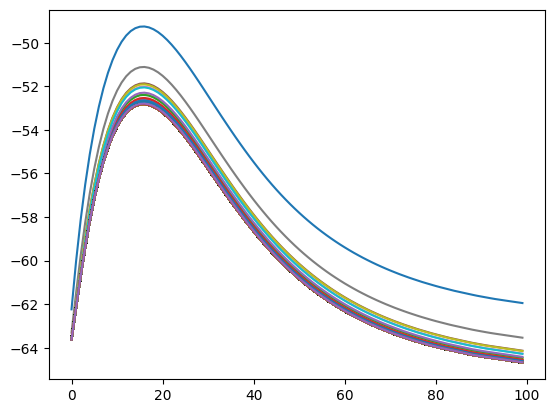

In [16]:
import matplotlib.pyplot as plt
t, v = H['time'], H['V']
t, v = np.array(t), np.array(v)
plt.plot(v)
plt.show()

In [17]:
v

array([[-62.23824 , -63.62706 , -63.62706 , ..., -63.62706 , -63.62706 ,
        -63.62706 ],
       [-60.032463, -62.16621 , -62.16621 , ..., -62.16621 , -62.16621 ,
        -62.166183],
       [-58.14178 , -60.726994, -60.726994, ..., -60.726994, -60.726994,
        -60.72688 ],
       ...,
       [-61.888165, -64.616135, -64.616135, ..., -64.616135, -64.616135,
        -64.6073  ],
       [-61.918682, -64.64665 , -64.64665 , ..., -64.64665 , -64.64665 ,
        -64.63782 ],
       [-61.9492  , -64.67717 , -64.67717 , ..., -64.67717 , -64.67717 ,
        -64.668335]], shape=(100, 1485), dtype=float32)